# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [39]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

# <--ADIB NOTES-->
# Another approach is to use a pandas built-in function to describe the inforamtion
# Transform the array into a pandas series -> use describe()
# To ensure correct formatting, utilize lambda
# print pd.Series(prices).describe().apply(lambda x: '${:,.2f}'.format(x))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**<font color='red'>Answer:</font> **

- **RM**: For average homes, an increase in number of rooms increases the square foot size of the house. An increase in the size of the house will most likely increase the price of the house. Therefore, as RM increases -> home price increases.

- **LSTAT**: An increase in the LSTAT percentage may signify the house is located in/close to a poor area. This will decrease the value of the home due to elements that most people associate with poor neighborhoods: such as crime, dirtiness, and under-funded education systems. Therefore, as LSTAT increases -> home price decreases.

- **PTRATIO**: Ideally, parents would love to have their children go to a school where the child can have more one-to-one time with the teacher; therefore, a low PTRATIO ratio will likely yield a higher price for a home. To summarize, as PTRATIO decreases -> home price increases.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**<font color='red'>Answer:</font> **
- For a goodness of fit quality check, I'd accept this model for most scenarios.
- The R^2 value of the model is very close to 1, and has a 92% chance of predicting the variance of our dependent variable based on the input value. For this simple use case, it's a good model. However, the R^2 metric does not provide any information as to whether enough data points were used to reach a solid decision. Ideally, more context behind the data would be essential to provide a more confident assessment.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'

# sklearn.cross_validation is deprecated as of sklearn 0.18
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
# <-- ADIB NOTE -->
# train_test_split(X, y, test_size = SIZE_OF_TEST_IN_%)
# "Split arrays or matrices into random train and test subsets"
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**<font color='red'>Answer:</font> **

The test-train split helps us determine whether our model is predicting the home prices accurately. If we were to use all the data for training, we cannot reuse the training data to test our model since the model may likely 'memorize' the results (leading to an overfitting situation). Providing insuffient training data may lead to a situation where the model is underfitting and is biased (does not have the full picture of the data) - since the computer has very little to go with to provide a good prediction.

After reviewing few sites online, the 80/20 split is a good start for training-testing data split. Splitting the data further into training-cross validation-testing will help assess our predictive model's accuracy and effectiveness.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

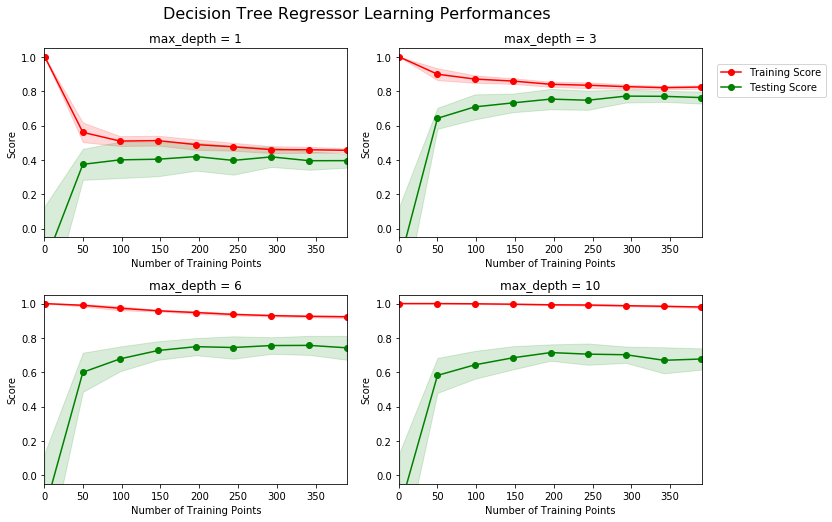

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**<font color='red'>Answer:</font> **

- My analysis would be based on the graph with max_depth = 3
- As more training points are added to this model, the testing and training curve will eventually converge closer to a single point.
- Additional training points won't add any additional value to the model. While the uncertainty region for the testing score curve is benefiting from the gain in training points (smaller variance in the shading), we can see that the curve is nearly plateauing and any additional point will not provide any new information. Another factor for not adding additional points is that it would cost a lot if the training process is computationally intensive, especially if we can determine from the current number of training points that the model is doing a good job.
- One essential item to note is that the training score dropped slightly. Learning from the documentation (http://scikit-learn.org/stable/modules/learning_curve.html), it stated that identifying a better model that can generate less bias (thus increasing training score) may help alleviate this matter.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

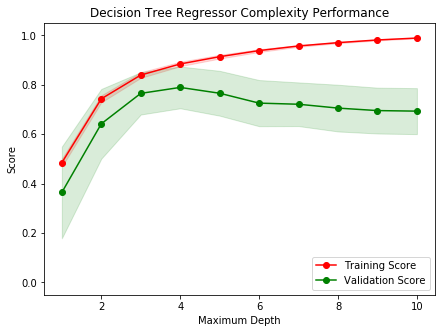

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**<font color='red'>Answer:</font> **

- When the model is trained with a maximum depth of 1, we're **underfitting** since the R^2 score is low for both training and validation. This represents that the model is suffering from high bias.

- When the model is trained with a maximum depth of 10, we're **overfitting** since the R^2 score for the training is great, but the validation score is suffering. Visually, we can identify this behavior through the growing gap between the training and validation score, which represents the high variance in the model's predition as we increase the maximum depth.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**<font color='red'>Answer:</font> **
- The ideal model that can generalize unseen data would be a model that utilizes a decision tree with a maximum depth = 3. 

- The reason behind my answer is derived from two sources: The first is the graph before Question 4, which demonstrates the convergence point for the model when a maximum-depth of 3 is used: The convergence is set at a high R^2 score, and demonstrates little variance and bias in the model. The second source is the graph before Question 5, which provided additional insight with regards to how the model would behave given varying maximum-depth. The model with maximum-depth of 3 had the smallest possible gap between the training and validation score, making it the ideal choice for our decision tree model.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**<font color='red'>Answer:</font> **
- There are many estimators/predictive algorithms, with each having many different parameters or settings. Different combination of these parameters will yield different levels of accuracy (measured in F1 Score or R^2 Score), and identify the best possible score manually is a daunting task. Luckily, the process is automated through the Grid Search technique. The Grid Search technique helps the analyst identify the best values for a given set of parameters, and it creates a grid of possible combinations and examines each of their outcome based on a score, such as R^2 or F1 score. The model with the best score in the grid is selected. Within the Sklearn library, the Grid Search tool identifies the best combination based on the inputted parameters, and then returns a classifier based on the combination selected.
- For our example, the Grid Search technique can help us refine our decision tree model by identifying both the maximum depth and the minimum samples leaf for our tree to increase our R^2 score. We don't necessarily need two axis, as we can also focus on a single parameter (like maximum_depth only, similar to the complexity curve). From the Udacity course, the example of SVM optimization was provided where we identified the best F1 Score given the different Kernel inputs and C value.
- The Grid Search technique is essential as it helps us eliminate heavy computational work by narrowing our choices of parameters to what works best. Thus, optimizing our learning algorithm.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**<font color='red'>Answer:</font> **

When we develop a predictive model, we split our initial data set into training and testing. An additional step that we can take in order to enhance our predictive model is via cross-validation technqiues, which adds an additional layer of testing. While the Grid Search is helpful in identifying the ideal combination of parameters for our model, it also may fall into the risk of overfitting our model as it will select parameters that fit best with the given training data we provided it. In order to alleviate this issue, we use the cross-validation technique to help us avoid overfitting our model by examining our model's effectiveness using different training and testing sets.

The k-fold cross-validation training technique is one of the common methods used to test the accuracy of our predictive model. The process involves splitting our training data into 'k' equal sized buckets. Of the 'k' buckets, a single bucket will be used to test our model, while the rest of the buckets are used to train our model. This process is repeated 'k' number of times, where a new bucket is selected each time for testing, while the rest are used for training. Based on the result of each test from the k-fold cross validation, we average all the results and identify our model's predictive accuracy. Ideally, it's best to shuffle/randomize the bucketing process of the k-fold cross validation in order to minimize potential biases from our data set.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [25]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.2, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.2, train_size=None, random_state=None)
    # cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # <-- ADIB NOTE --> n_split = K, and test_size would mean 20% of the training set. Slightly different
    # from k-fold of size 10, since it would be 10% versus 20%. Therefore, the test_size is slightly greater
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, train_size=None, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[x for x in range(1,11)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # <-- ADIB NOTE --> make_scorer takes a function as an input
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    #
    # <-- ADIB NOTE --> GridSearchCV(estimator, param_grid, scoring=None, 
    # fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, 
    # pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [24]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**<font color='red'>Answer:</font> **

Based on the fit, the optimal model would have a maximum_depth of 4. This is strikingly different from my analysis on Question 6 where I shared that the best model would have a maximum_depth of 3. I believe one of the reasons behind this shift is due to the implementation of the cross-validation technique, which may have altered the maximum_depth value based on the outcomes from the results collected via the CV.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [26]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $398,100.00
Predicted selling price for Client 2's home: $226,240.00
Predicted selling price for Client 3's home: $928,200.00


**<font color='red'>Answer:</font> **

Based on the information collected earlier from the original data set, the median price of homes were $438,900.00. The current break-down for home pricing for each client is as follows:

- Predicted selling price for Client 1's home: $398,100.00

For Client 1, they have a family house that has 5 rooms, with a great student-teacher ratio. However, their neighborhood poverty level is a bit high, with nearly 1 in 5 individuals in their neighborhood being poor. If the neighborhood poverty value holds great weight in our model, I would suspect that the price of the home be less than the median. Based on this information, I think the price is reasonable as it is slightly less than the median. If I could round it, I'll make it $400,000.

- Predicted selling price for Client 2's home: $226,240.00

Client 2 has a small house that has 4 rooms, with a higher student-teacher ratio relative to client 1. With nearly 1 in 3 individuals in their neighborhood being poor, it makes their house very unattractive to potential buyers. If the neighborhood poverty value holds great weight in our model, I would suspect that the price of the home be less than the median, but not less than the minimum of $105,000 due to the size of the house. Examining the features of the home that sold at the minimum didn't add much value given the 3 parameters, so I'm missing some additional information to make a good assessment. However, based on the information I have, this seems like a reasonable starting price.

- Predicted selling price for Client 3's home: $928,200.00

Client 3 most likely has a villa/small mansion. Hosting up to 8 rooms, with the smallest student-teacher ratio relative to all other clients. With 3 out of 100 3 individuals in their neighborhood being poor, the house may be situated in a more middle class/affluent neighborhood. Based on this information, I won't be surprised if the home price is greater than the median; however, it's too close to the price of the home that received the highest bid ($1,024,800). 

I may need to collect additional information to come to a better assessment. In other words, the model may have provided too high of a price for this home, and this may be the case because there may have been very few homes that sold at high prices (which is why the median is ~ $440K). A histogram may help provide this additional insight.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [42]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**<font color='red'>Answer:</font> **

There are a few problems with this model:
- The data is old: So much has happened since 1978, from inflation, tax laws, shift in social conditions and economic status of individuals in the area, gentrification, and the list can go on. Developing forecasting models based on a data set from 41 years ago is at best a good study of historical data versus decision making tool.
- There are missing factors from the analysis that may change the price of a home. For example, whether the kitchen sets are new or old, whether the home has a pool (very unlikely in Boston), whether the home is close to notable universities such as Harvard or MIT, distance from work, distance from highways or public transport. The model may be discounting these factors since it's limited to a small pool of data.
- Assuming we had built this model back in the 70's during the post-Disco era, we cannot guarantee we have sufficient data for different types of homes in order to make an accurate assessment. The data may work best for average homes, but may not be the best for more affluent homes or homes in very poor neighborhoods. To provide a better example, if Boston were 10,000 homes that were average homes (prices close to median of \$440,000), with 20 homes that are priced more than \$600K, we won't get a good assessment for the more affluent homes given we have very few data sets to work with for those homes.
- Definitely not good for rural cities because the nature of rural city and urban city is different (even two different urban cities may have great differences!).

Based on the assessments above, the model should not be used in the real-world setting, and further assessment should be taken into account to help improve the model. A mix of new objective data, combined with human behavior analysis (identifying which factors impact home buying decisions), may help us develop a model that can help our real estate agent, and their clients!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.